In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt


/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv


In [3]:
db = pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv')


In [4]:
db

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [5]:
db.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [6]:
db.duplicated().sum()

0

In [7]:
col = db.columns
col

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [8]:
db.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [9]:
for i in col:
    if db[i].dtypes == 'object':
        db[i]= db[i].str.strip()       

In [10]:
db.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
unique_values_counts = db['Platform'].value_counts()

unique_values_db = pd.DataFrame({
    'Unique_Values': unique_values_counts.index,
    'Frequency': unique_values_counts.values
})    

In [12]:
unique_values_db

,Unique_Values,Frequency
0,Instagram,258
1,Twitter,243
2,Facebook,231


In [13]:
freq = unique_values_db['Frequency']
freq

0    258
1    243
2    231
Name: Frequency, dtype: int64

In [14]:
unique_values_list = list(unique_values_db['Unique_Values'])
unique_values_list

['Instagram', 'Twitter', 'Facebook']

In [15]:
summ = freq.sum()

percentage = []
for i in range(0,3):
    temp = (unique_values_db.loc[i, 'Frequency']/summ)*100
    percentage.append(temp)
percentage

[35.24590163934426, 33.19672131147541, 31.557377049180328]

([<matplotlib.patches.Wedge at 0x7e89152cc3a0>,
 [Text(-0.9839358319684992, 0.49180308922215743, 'Instagram'),
  Text(0.12718134133031878, -1.0926229479639447, 'Twitter'),
  Text(0.9204751188617967, 0.6022670135051077, 'Facebook')],
 [Text(-0.5366922719828177, 0.2682562304848131, '35.2%'),
  Text(0.06937164072562842, -0.5959761534348789, '33.2%'),
  Text(0.5020773375609799, 0.32850928009369507, '31.6%')])

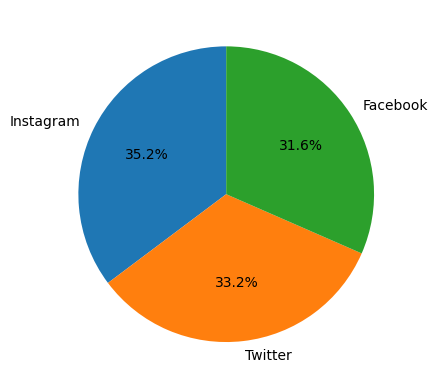

In [16]:
plt.pie(percentage, labels=unique_values_list, autopct='%1.1f%%', startangle=90)

In [17]:
unique_values_counts = db['Hashtags'].value_counts()

unique_values_db = pd.DataFrame({
    'Unique_Values': unique_values_counts.index,
    'Frequency': unique_values_counts.values
})   
unique_values_counts

Hashtags
#Playful #CarnivalEscapade                     3
#Hopeful #SeedsOfOptimism                      3
#Proud #ScalingPeaks                           3
#Compassionate #TearsOfEmpathy                 3
#Numbness #EmotionalShield                     2
                                              ..
#Curiosity #SeekerOfKnowledge                  1
#Confusion #LabyrinthOfThoughts                1
#Melancholy #WistfulYearning                   1
#Nostalgia #PhotoAlbumStories                  1
#VirtualEntertainment #HighSchoolPositivity    1
Name: count, Length: 692, dtype: int64

In [26]:
all_text = ' '.join(db['Hashtags'].astype(str))
words = all_text.split()

word_counts = pd.Series(words).value_counts()

sentiments_db = pd.DataFrame({
    'Unique_Values': word_counts.index,
    'Frequency': word_counts.values
})   
 
sentiments_db = sentiments_db.head(10)
sentiments_db

,Unique_Values,Frequency
0,#Serenity,15
1,#Excitement,13
2,#Gratitude,13
3,#Despair,11
4,#Nostalgia,11
5,#Curiosity,10
6,#Contentment,10
7,#Hopeful,9
8,#Grief,9
9,#Awe,9


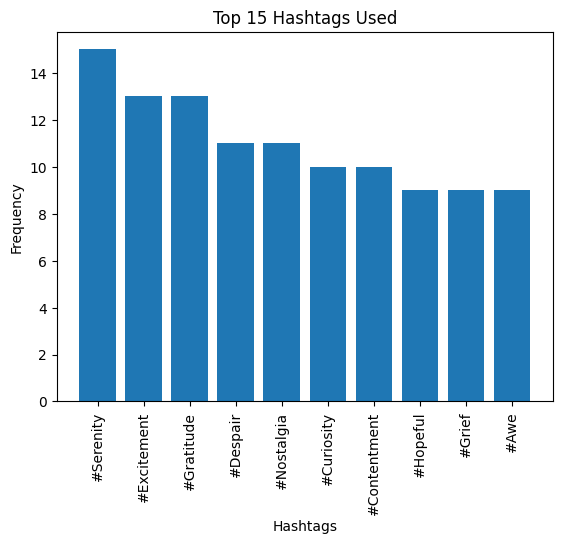

In [27]:
plt.bar(sentiments_db["Unique_Values"], sentiments_db["Frequency"])
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 15 Hashtags Used')
plt.xticks(rotation='vertical')
# Display the chart
plt.show()

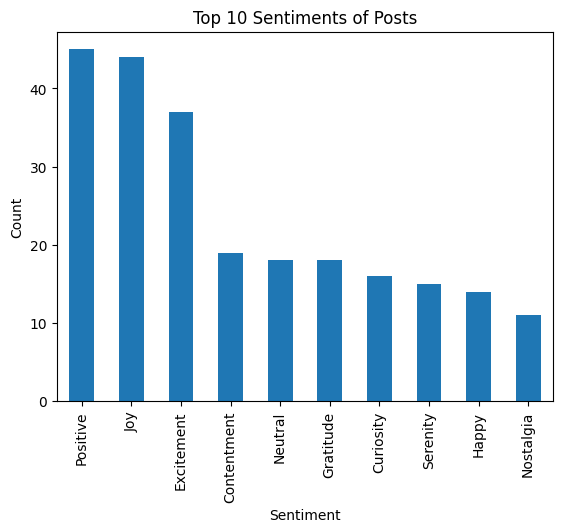

In [28]:
db['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments of Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [42]:
unique_countries = db['Country'].value_counts()

country_db = pd.DataFrame({
    'Unique_Values': unique_countries.index,
    'Frequency': unique_countries.values
})   
country_db = country_db.head(10)
country_db

,Unique_Values,Frequency
0,USA,188
1,UK,143
2,Canada,135
3,Australia,75
4,India,70
5,Brazil,17
6,France,16
7,Japan,15
8,Germany,14
9,Italy,11


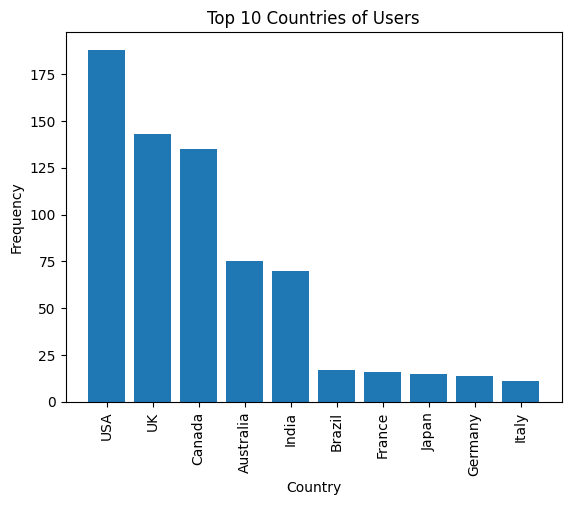

In [43]:
plt.bar(country_db["Unique_Values"], country_db["Frequency"])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 Countries of Users')
plt.xticks(rotation='vertical')
# Display the chart
plt.show()